# 感知机

$$o=\sigma(<w, x>+b)\quad\sigma(x)=\begin{cases}1&if x >0 \\ -1 & otherwise\end{cases}$$

**感知机是一个二分类的问题**

- 线性回归：输出的是一个值
- Softmax：输出的是多个类

**感知机原型**

```
initialize w = 0 and b = 0
repeat
    if yi[<w, xi> + b] <= 0 then        // 预测错误 假定正确值为1
        w = w + yixi and b = b + yi     // 权重更新
    endif
until all classified correctly
```

**等价于批量大小为1的梯度下降**

$$loss(y, x, w) = max(0, -y<w,x>)$$

> 分类正确的话 $-y<w, x> \quad> 0$ 需要 $max(0)$ 抑制分类正确时的更新

**收敛定理**

- 数据在半径 $r$ 内
- 存在一个余量 $\rho$
    - $y(x^Tw+b)\geq\rho$ 即所有类分类正确
- 则感知机在 $\frac{r^2 + 1}{\rho^2}$ 步后收敛

### 感知机的问题

感知机不能拟合 `XOR` 问题：Eg. 一三象限一类，二四象限一类

## 多层感知机

Eg. x 轴是一个感知机，y轴是一个感知机

||1|2|3|4|
-|-|-|-|-
|类型|1|2|1|2|
|x轴|+|+|-|-|
|y轴|+|-|-|+|

则两个感知机做异或就能完成分类问题

**相当于引入了隐藏层**, 隐藏层大小是超参数

**单个隐藏层，单分类**

- 输入层 $x\in R^n$
- 隐藏层 $W_1\in R^{m\times n},b_1\in R^m$ *一层就需要一个参数*
- 输出层 $w_2\in R^m, b_2\in R$

$$\begin{cases} h=\sigma(W_1x+b_1)\\ o=w_2^Th+b_2\end{cases}$$

$$\begin{cases}o_v = w_{2(1\times m)}^T\cdot W_{1(m\times n)}\cdot x_{(n\times 1)}\\ o_c = b2 + w_{2(1\times m)}\cdot b_{1(m\times 1)}\end{cases}$$

**$\sigma$激活函数**，按元素函数，其余部分与softmax类似

**激活函数**：一定是非线性，否则输出依旧是线性函数，就相当于单层感知机

******

**单个隐藏层，多分类**

$$y_1,y_2,\cdots,y_k = softmax(o_1,o_2,\cdots,o_k)$$

- Softmax : 将 $R$ 上的预测结果，映射到 $[0, 1]$ 的概率上
- 多分类：Softmax + 隐藏层
- 输入层 $x\in R^n$
- 隐藏层 $W_1\in R^{m\times n},b_1\in R^m$ *一层就需要一个参数*
- 输出层 $w_2\in R^{m\times k}, b_2\in R^{k}$ **与单分类的区别就是输出多了k**

$$\begin{cases} h=\sigma(W_1x+b_1)\\ o=w_2^Th+b_2\\ y=softmax(o)\end{cases}$$

******

**多隐藏层**

$$\begin{cases}
h_1=\sigma(W_1x+b_1)\\
h_2=\sigma(W_2h_1+b_2)\\
h_3=\sigma(W_3h_2+b_3)\\
o=W_4h_3+b_4)\\
\end{cases}$$

> 超参数：隐藏层层数，隐藏层大小

## Skill

**输入复杂度大**：

- 单隐藏层：第一层要大
- 多隐藏层：第一层比单隐藏层小一点，第二层比第一层小一点，以此类推

> 前几层可以稍微扩展：$128\rightarrow256\rightarrow128\rightarrow64\rightarrow16$

## 激活函数

非线性化，避免隐藏层层数塌陷，输出层不需要激活

**Sigmoid激活函数**：输出投影到$[0,1]$

$$sigmoid(x)=\frac{1}{1+e^{-x}}$$

**tanh激活函数**：输出投影到$[-1,1]$

$$tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$$

**ReLU激活函数**：rectified linear unit

$$ReLU(x)=max(x,0)$$

> 优点：计算很快，不需要指数运算

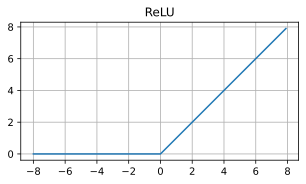

In [1]:
import torch
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

%matplotlib inline

backend_inline.set_matplotlib_formats('svg')
plt.rcParams["figure.figsize"] = (5, 2.5)
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach())
plt.title("ReLU")
plt.grid("on")

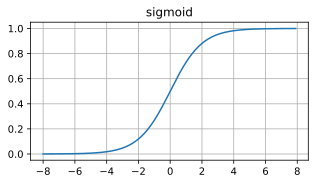

In [2]:
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())
plt.title("sigmoid")
plt.grid("on")

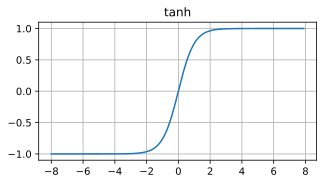

In [3]:
y = torch.tanh(x)
plt.plot(x.detach(), y.detach())
plt.title("tanh")
plt.grid("on")

# 多层感知机从零开始

In [4]:
import time
import torchvision
import os

In [5]:
batch_size = 256

data_path = os.path.join(".", "data")
num_workers = os.cpu_count()
transformer = torchvision.transforms.ToTensor()

train_iter = torch.utils.data.DataLoader(torchvision.datasets.FashionMNIST(data_path, train=True, download=True, transform=transformer), shuffle=True, batch_size=batch_size, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(torchvision.datasets.FashionMNIST(data_path, train=False, download=True, transform=transformer), shuffle=False, batch_size=batch_size, num_workers=num_workers)

In [6]:
""" 单隐藏层的多层感知机 单层为 256 """
num_inputs, num_hiddens, num_outputs = 28 * 28, 512, 10

# W1 784 * 256, b1 1 * 256
W1 = torch.normal(mean=0, std=0.1, size=(num_inputs, num_hiddens), requires_grad=True)
b1 = torch.zeros(size=(1, num_hiddens), requires_grad=True)

# W2 256 * 10, b2 1 * 10
W2 = torch.normal(mean=0, std=0.1, size=(num_hiddens, num_outputs), requires_grad=True)
b2 = torch.zeros(size=(1, num_outputs), requires_grad=True)

params = [W1, b1, W2, b2]

"""
设置 W 全为零时，偏导为 0 ，参数不更新
"""

'\n设置 W 全为零时，偏导为 0 ，参数不更新\n'

In [7]:
""" ReLU 激活函数 """
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x, a)

In [8]:
""" module """
def net(x):
    x = x.reshape((-1, num_inputs))
    h = relu(torch.matmul(x, W1) + b1) # @ = matmul()
    return (torch.matmul(h, W2) + b2)

loss = torch.nn.CrossEntropyLoss(reduction='none')
updater = torch.optim.SGD(params=params, lr=0.1)

In [9]:
# 训练器与 softmax 相同
""" 累加器对象 """
class Accumulator: # 累加器对象
    """ 在 n 个变量上累加 """
    def __init__(self, n):
        self.data = [0.0] * n # python 语法 [0]*n将n个list连接在一起

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
        # zip() 将迭代器打包成元组

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, index):
        return self.data[index]

""" 与真实值对比 """
def accuracy(y_hat, y):
    """ 分类问题，统计正确个数 """
    # y_hat 是二维矩阵，取每一行的最大值
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # 返回最大值对应的序号
    cmp = y_hat.type(y.dtype) == y # 保证 y 和 y_hat 类型相同
    # cmp 是 bool 类型
    return float(cmp.type(y.dtype).sum())

""" 评估 net 的准确性 """
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval() # 如果是 torch 神经网络，则设置为评估模式，不进行反向传播
    accum = Accumulator(2)
    for X, y in data_iter:
        accum.add(accuracy(net(X), y), y.numel())
    return accum[0] / accum[1]

""" 一轮训练 """
def train_epoch_ch3(net, train_iter, loss, params, updater, lr):
    if isinstance(net, torch.nn.Module):
        net.train() # 训练模式，进行反向传播
    metric = Accumulator(3)
    for X, y in train_iter:
        l = loss(net(X), y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(params, lr, len(X)) # 更新器需要 batch_size
        metric.add(float(l.sum()), accuracy(net(X), y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

""" 训练函数 """
def train_ch3(net, train_iter, test_iter, loss, num_epochs, params, updater, lr):
    accumulator = [Accumulator(3) for _ in range(num_epochs)]
    for epoch in range(num_epochs):
        start = time.perf_counter()
        train_metrics = train_epoch_ch3(net, train_iter, loss, params, updater, lr) # 训练误差
        test_accuracy = evaluate_accuracy(net, test_iter) # 测试误差
        accumulator[epoch].add(train_metrics[0], train_metrics[1], test_accuracy)
        end = time.perf_counter()
        print(f"Finish {epoch + 1} train, cose {end-start:.3f} sec")
    return accumulator

In [10]:
""" 训练 """
num_epochs = 30
all_start = time.perf_counter()
accumulator = train_ch3(net, train_iter, test_iter, loss, num_epochs, None, updater, None)
all_end = time.perf_counter()
print(f"\n Totally use {all_end-all_start:.3f} sec")

Finish 1 train, cose 10.331 sec
Finish 2 train, cose 14.197 sec
Finish 3 train, cose 14.693 sec
Finish 4 train, cose 13.040 sec
Finish 5 train, cose 7.611 sec
Finish 6 train, cose 7.937 sec
Finish 7 train, cose 7.743 sec
Finish 8 train, cose 8.190 sec
Finish 9 train, cose 7.686 sec
Finish 10 train, cose 7.842 sec
Finish 11 train, cose 7.660 sec
Finish 12 train, cose 7.685 sec
Finish 13 train, cose 7.547 sec
Finish 14 train, cose 7.691 sec
Finish 15 train, cose 7.813 sec
Finish 16 train, cose 8.292 sec
Finish 17 train, cose 7.955 sec
Finish 18 train, cose 7.732 sec
Finish 19 train, cose 7.716 sec
Finish 20 train, cose 7.626 sec
Finish 21 train, cose 7.662 sec
Finish 22 train, cose 7.746 sec
Finish 23 train, cose 7.874 sec
Finish 24 train, cose 8.115 sec
Finish 25 train, cose 7.761 sec
Finish 26 train, cose 7.652 sec
Finish 27 train, cose 7.587 sec
Finish 28 train, cose 7.857 sec
Finish 29 train, cose 7.696 sec
Finish 30 train, cose 8.012 sec

 Totally use 254.951 sec


Test accuracy : 0.880


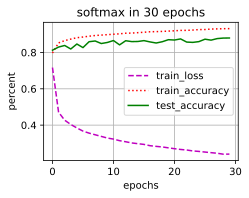

In [11]:
""" 打印图片 """
def show_img(imgs, num_rows, num_cols, title=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    plt.rcParams["figure.figsize"] = figsize
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.title(title[i])
        plt.axis('off')
        if torch.is_tensor(imgs[i].numpy()):
            plt.imshow(imgs[i].numpy())
        else:
            plt.imshow(imgs[i])

""" 绘图 """
backend_inline.set_matplotlib_formats('svg')
plt.rcParams["figure.figsize"] = (3.5, 2.5)

train_loss, train_accuracy, test_accuracy = [], [], []
for i in range(num_epochs):
    train_loss.append(accumulator[i][0])
    train_accuracy.append(accumulator[i][1])
    test_accuracy.append(accumulator[i][2])
    
plt.plot(list(range(num_epochs)), train_loss, 'm--')
plt.plot(list(range(num_epochs)), train_accuracy, 'r:')
plt.plot(list(range(num_epochs)), test_accuracy, 'g-')
plt.legend(["train_loss", "train_accuracy", "test_accuracy"])
plt.xlabel('epochs')
plt.ylabel('percent')
plt.title(f'softmax in {num_epochs} epochs')
plt.grid(True)

print(f"Test accuracy : {test_accuracy[-1]:.3f}")

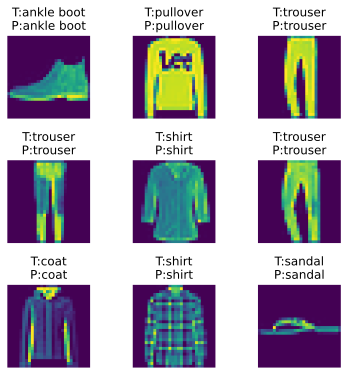

In [12]:
""" 获得标签索引对应文本"""
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', \
                 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


""" 预测值 """
def predtic_ch3(net, test_iter, rows, cols):
    n = rows * cols
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    predicts = get_fashion_mnist_labels(net(X).argmax(axis=1))
    title = [f"T:{true}\nP:{predict}" for true, predict in zip(trues, predicts)]
    show_img(X[0:n].reshape([n, 28, 28]), rows, cols, title=title[0:n], scale=2)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
predtic_ch3(net, test_iter, 3, 3)

# 精简实现

In [13]:
batch_size = 256

data_path = os.path.join(".", "data")
num_workers = os.cpu_count()
transformer = torchvision.transforms.ToTensor()

train_iter = torch.utils.data.DataLoader(torchvision.datasets.FashionMNIST(data_path, train=True, download=True, transform=transformer), shuffle=True, batch_size=batch_size, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(torchvision.datasets.FashionMNIST(data_path, train=False, download=True, transform=transformer), shuffle=False, batch_size=batch_size, num_workers=num_workers)

In [14]:
net = torch.nn.Sequential(torch.nn.Flatten(), torch.nn.Linear(784, 512), torch.nn.ReLU(), torch.nn.Linear(512, 10))

def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.1, mean=0)
        torch.nn.init.zeros_(m.bias)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=10, bias=True)
)

In [15]:
lr, num_epochs = 0.01, 30
loss = torch.nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)
all_start = time.perf_counter()
accumulator = train_ch3(net, train_iter, test_iter, loss, num_epochs, None, trainer, None)
all_end = time.perf_counter()
print(f"\n Totally use {all_end-all_start:.3f} sec")

Finish 1 train, cose 7.605 sec
Finish 2 train, cose 7.899 sec
Finish 3 train, cose 7.572 sec
Finish 4 train, cose 7.420 sec
Finish 5 train, cose 7.457 sec
Finish 6 train, cose 7.374 sec
Finish 7 train, cose 7.552 sec
Finish 8 train, cose 7.509 sec
Finish 9 train, cose 7.587 sec
Finish 10 train, cose 7.875 sec
Finish 11 train, cose 7.554 sec
Finish 12 train, cose 7.447 sec
Finish 13 train, cose 7.519 sec
Finish 14 train, cose 7.368 sec
Finish 15 train, cose 7.583 sec
Finish 16 train, cose 7.521 sec
Finish 17 train, cose 7.573 sec
Finish 18 train, cose 7.886 sec
Finish 19 train, cose 7.550 sec
Finish 20 train, cose 7.474 sec
Finish 21 train, cose 7.494 sec
Finish 22 train, cose 7.585 sec
Finish 23 train, cose 7.471 sec
Finish 24 train, cose 7.500 sec
Finish 25 train, cose 7.561 sec
Finish 26 train, cose 7.887 sec
Finish 27 train, cose 7.546 sec
Finish 28 train, cose 7.478 sec
Finish 29 train, cose 7.508 sec
Finish 30 train, cose 7.553 sec

 Totally use 226.911 sec


Test accuracy : 0.846


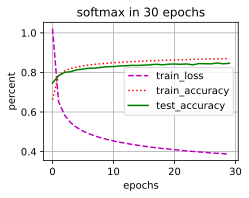

In [16]:
""" 打印图片 """
def show_img(imgs, num_rows, num_cols, title=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    plt.rcParams["figure.figsize"] = figsize
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.title(title[i])
        plt.axis('off')
        if torch.is_tensor(imgs[i].numpy()):
            plt.imshow(imgs[i].numpy())
        else:
            plt.imshow(imgs[i])

""" 绘图 """
backend_inline.set_matplotlib_formats('svg')
plt.rcParams["figure.figsize"] = (3.5, 2.5)

train_loss, train_accuracy, test_accuracy = [], [], []
for i in range(num_epochs):
    train_loss.append(accumulator[i][0])
    train_accuracy.append(accumulator[i][1])
    test_accuracy.append(accumulator[i][2])
    
plt.plot(list(range(num_epochs)), train_loss, 'm--')
plt.plot(list(range(num_epochs)), train_accuracy, 'r:')
plt.plot(list(range(num_epochs)), test_accuracy, 'g-')
plt.legend(["train_loss", "train_accuracy", "test_accuracy"])
plt.xlabel('epochs')
plt.ylabel('percent')
plt.title(f'softmax in {num_epochs} epochs')
plt.grid(True)

print(f"Test accuracy : {test_accuracy[-1]:.3f}")          

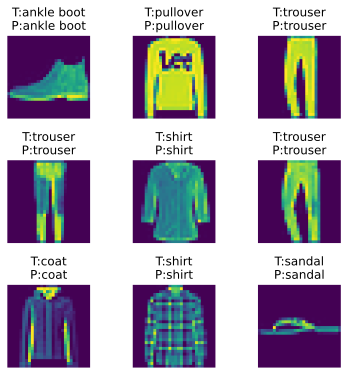

In [17]:
""" 获得标签索引对应文本"""
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', \
                 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


""" 预测值 """
def predtic_ch3(net, test_iter, rows, cols):
    n = rows * cols
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    predicts = get_fashion_mnist_labels(net(X).argmax(axis=1))
    title = [f"T:{true}\nP:{predict}" for true, predict in zip(trues, predicts)]
    show_img(X[0:n].reshape([n, 28, 28]), rows, cols, title=title[0:n], scale=2)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
predtic_ch3(net, test_iter, 3, 3)

# QA

**一层神经网络**

一般来说，一层是包含激活函数的；带可学习的权重的算一层

**svm & mlp**

支持向量机：有更好的数学解释，不建议是改神经网络比较复杂

**神经网络 层数和层的大小？**

在模型复杂度的相同的情况下，层数更多的更好学习

> 单层广网络，非常容易过拟合；深层网络更容易收敛

**多层感知机**：

- 线性 => 单隐藏层 => 单隐藏层大小 => 两个隐藏层 => 两个隐藏层大小